<a href="https://colab.research.google.com/github/OswaldoMoper/Mathematical_Data_Analysis/blob/master/An%C3%A1lisis_6_(DP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow==2.13.0

In [ ]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
lr = 1
bias = 1
weights = [random.random(), random.random(), random.random() ]

In [ ]:
def Perceptron( input1, input2, output ):
  outputP = input1*weights[0] + input2*weights[1] + bias*weights[2]
  if outputP >= 0:
    outputP = 1
  else:
    outputP = 0
  error = output - outputP
  weights[0] += error +lr*input1
  weights[1] += error +lr*input2
  weights[2] += error +lr*bias

In [ ]:
for i in range( 100 ):
  Perceptron( 1, 1, 1 )
  Perceptron( 1, 0, 1 )
  Perceptron( 0, 1, 1 )
  Perceptron( 0, 0, 0 )

In [ ]:
a = int( input( "Verdadero (1) / Falso (0) : " ) )
b = int( input( "Verdadero (1) / Falso (0) : " ) )

outputP = a*weights[0] + b*weights[1] + bias*weights[2]
if outputP >= 0:
  outputP = 1
else:
  outputP = 0

print( f'{a} o {b} es {outputP}' )

Verdadero (1) / Falso (0) : 0
Verdadero (1) / Falso (0) : 0
0 o 0 es 1


# Exploratorio

In [ ]:
df_1 = pd.read_csv( '/content/mnist_train.csv', header = None )
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_2 = pd.read_csv( '/content/mnist_test.csv', header = None )
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat( [df_1, df_2] )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(70000, 785)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
X = df.iloc[:, 1:]
Y = df[0]

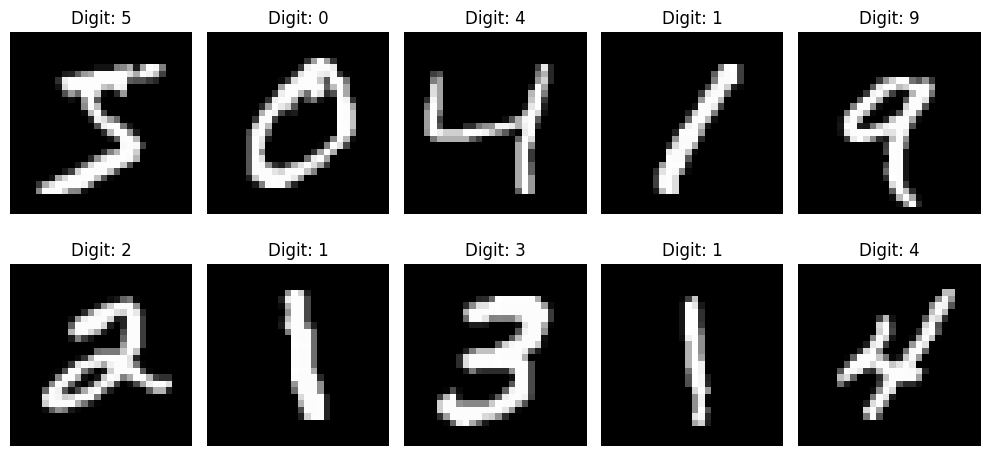

In [ ]:
fig, axs = plt.subplots( 2, 5, figsize = ( 10, 5 ) )
for i in range( 10 ):
  ax = axs[ i // 5, i % 5 ]
  ax.imshow( np.array( X.iloc[i] ).reshape( 28, 28 ), cmap = 'gray' )
  ax.set_title( f'Digit: {Y[i].values[0]}' )
  ax.axis( 'off' )
plt.tight_layout()
plt.show()

In [ ]:
digit_count = Y.value_counts().reset_index()
digit_count.columns = [ 'Digit', 'Count' ]
fig2 = px.pie( digit_count, values = 'Count', names = 'Digit', title = 'Digit Distribution', template = 'plotly_dark ' )
fig2.update_traces( textposition = 'inside', textinfo = 'percent+label' )
fig2.update_layout( showlegend = False )
fig2.show()

In [ ]:
X_norm = X / 255.0
X_norm.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Model 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, Y, test_size = 0.15, shuffle = True, random_state = 26 )
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size = 0.15, shuffle = True, random_state = 26 )

In [ ]:
y_train = to_categorical( y_train )
y_val = to_categorical( y_val )
y_test = to_categorical( y_test )

In [ ]:
model = Sequential([
      Flatten( input_shape = ( 784, ) )
    , Dense( 128, activation = 'relu' )
    , Dense( 10, activation = 'softmax' )
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


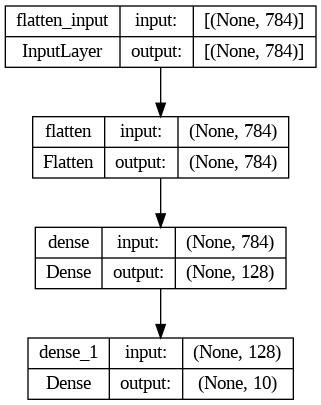

In [ ]:
plot_model( model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True )

In [ ]:
earlystopping = EarlyStopping( monitor = 'val_loss', restore_best_weights = True, patience = 20 )

In [ ]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

In [ ]:
y_test.shape

(10500, 10)

In [ ]:
history = model.fit( X_train, y_train, epochs = 100, batch_size = 32, validation_data = ( X_val, y_val ),  callbacks = [ earlystopping ] ) # validation_split = 0.1,

Epoch 1/100
1581/1581 [==============================] - 10s 6ms/step - loss: 0.2787 - accuracy: 0.9208 - val_loss: 0.1477 - val_accuracy: 0.9565
Epoch 2/100
1581/1581 [==============================] - 7s 4ms/step - loss: 0.1220 - accuracy: 0.9643 - val_loss: 0.1096 - val_accuracy: 0.9680
Epoch 3/100
1581/1581 [==============================] - 10s 6ms/step - loss: 0.0853 - accuracy: 0.9742 - val_loss: 0.0909 - val_accuracy: 0.9734
Epoch 4/100
1581/1581 [==============================] - 7s 4ms/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 0.0795 - val_accuracy: 0.9771
Epoch 5/100
1581/1581 [==============================] - 9s 6ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.0891 - val_accuracy: 0.9723
Epoch 6/100
1581/1581 [==============================] - 9s 5ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0756 - val_accuracy: 0.9750
Epoch 7/100
1581/1581 [==============================] - 7s 4ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0711 - val_

## Eval model 1

In [ ]:
score = model.evaluate( X_test, y_test )
score

329/329 [==============================] - 2s 7ms/step - loss: 0.0682 - accuracy: 0.9795


[0.06816268712282181, 0.9795238375663757]

In [ ]:
history.history.keys()
accuracy = history.history[ 'accuracy' ]
val_accuracy = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

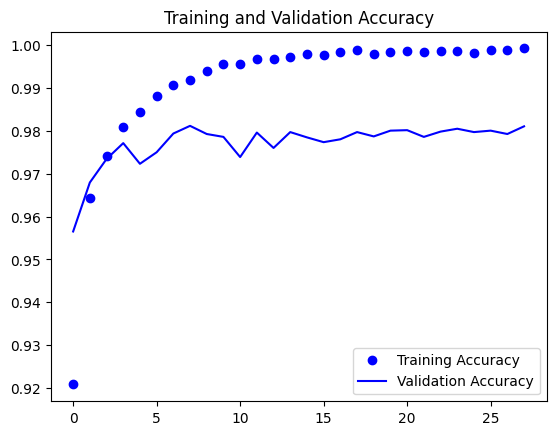

In [ ]:
epochs = range( len( accuracy ) )

plt.plot( epochs, accuracy, 'bo', label = 'Training Accuracy' )
plt.plot( epochs, val_accuracy, 'b', label = 'Validation Accuracy' )
plt.title( 'Training and Validation Accuracy' )
plt.legend()
plt.show()

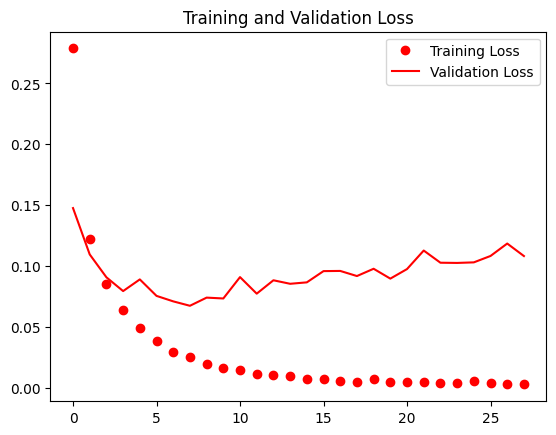

In [ ]:
plt.plot( epochs, loss, 'ro', label = 'Training Loss' )
plt.plot( epochs, val_loss, 'r', label = 'Validation Loss' )
plt.title( 'Training and Validation Loss' )
plt.legend()
plt.show()

In [ ]:
y_pred = np.argmax( model.predict( X_test ), axis = -1 )
y_true = np.argmax( y_test, axis = -1 )

329/329 [==============================] - 1s 2ms/step


<Axes: >

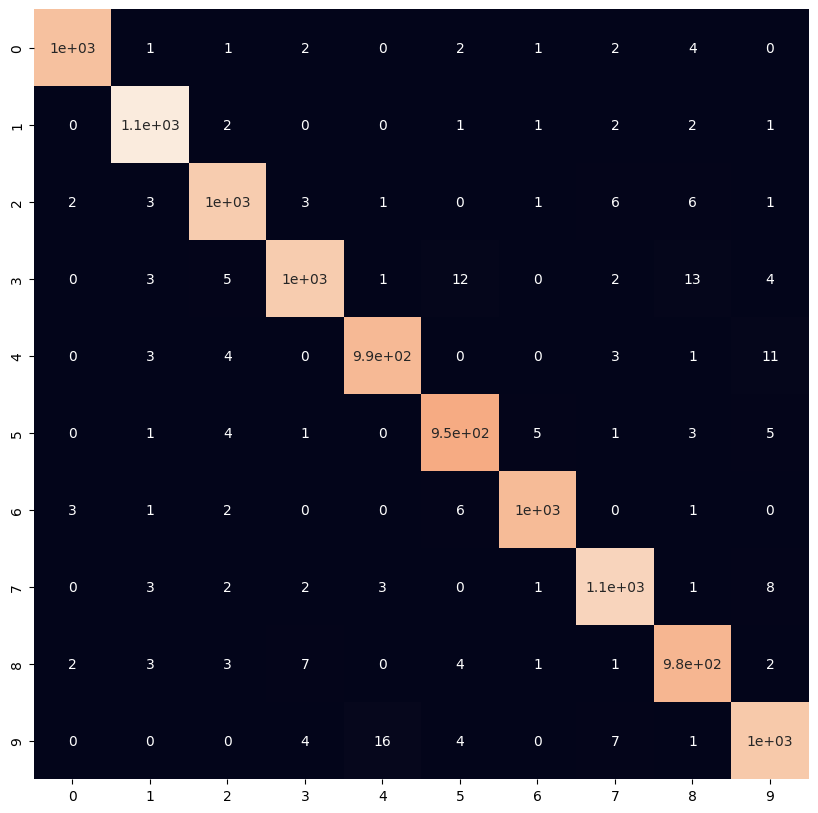

In [ ]:
cm = confusion_matrix( y_true, y_pred )
plt.figure( figsize = ( 10, 10 ) )
sns.heatmap( cm, annot = True, cbar = False )

In [ ]:
print( classification_report( y_true, y_pred ) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1029
           1       0.98      0.99      0.99      1151
           2       0.98      0.98      0.98      1069
           3       0.98      0.96      0.97      1088
           4       0.98      0.98      0.98      1013
           5       0.97      0.98      0.97       971
           6       0.99      0.99      0.99      1008
           7       0.98      0.98      0.98      1095
           8       0.97      0.98      0.97      1005
           9       0.97      0.97      0.97      1071

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



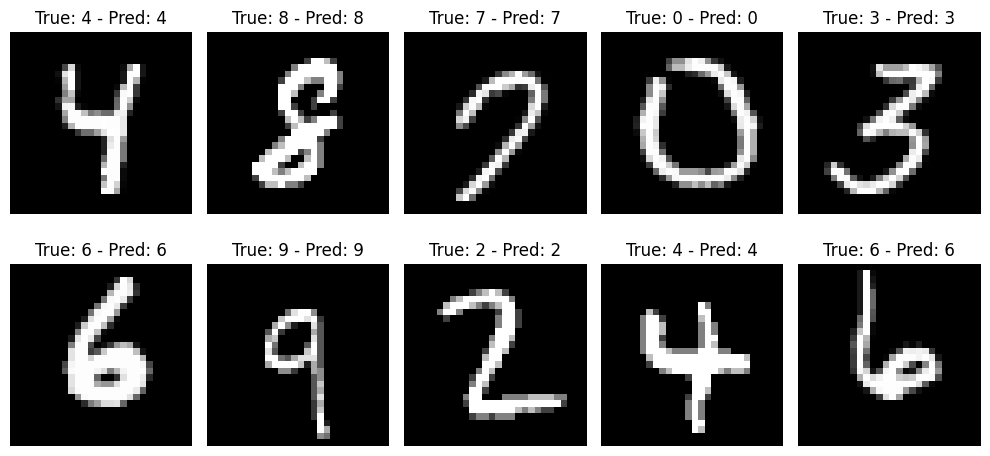

In [ ]:
fig, axs = plt.subplots( 2, 5, figsize = ( 10, 5 ) )
for i in range( 10 ):
  ax = axs[ i // 5, i % 5 ]
  ax.imshow( np.array( X_test.iloc[i] ).reshape( 28, 28 ), cmap = 'gray' )
  ax.set_title( f'True: { y_true[i] } - Pred: { y_pred[i] }' )
  ax.axis( 'off' )
plt.tight_layout()
plt.show()

#Model 2

In [ ]:
X_norm = X_norm.values.reshape(-1, 28, 28, 1)
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size = 0.15, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, shuffle = True)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

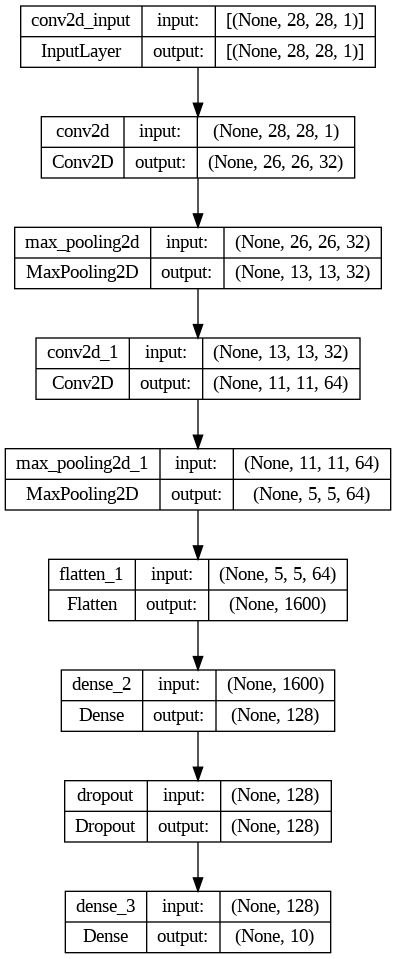

In [ ]:
plot_model( model, to_file = 'model_2_plot.png', show_shapes = True, show_layer_names = True )

In [ ]:
earlystopping = EarlyStopping( monitor = 'val_loss', restore_best_weights = True, patience = 20 )

In [ ]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

In [ ]:
history = model.fit( X_train, y_train, epochs = 100, batch_size = 48, validation_data = ( X_val, y_val ),  callbacks = [ earlystopping ] )

Epoch 1/100
1054/1054 [==============================] - 68s 63ms/step - loss: 0.2459 - accuracy: 0.9236 - val_loss: 0.0569 - val_accuracy: 0.9808
Epoch 2/100
1054/1054 [==============================] - 52s 49ms/step - loss: 0.0877 - accuracy: 0.9745 - val_loss: 0.0464 - val_accuracy: 0.9846
Epoch 3/100
1054/1054 [==============================] - 54s 51ms/step - loss: 0.0644 - accuracy: 0.9810 - val_loss: 0.0418 - val_accuracy: 0.9862
Epoch 4/100
1054/1054 [==============================] - 58s 55ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.0364 - val_accuracy: 0.9876
Epoch 5/100
1054/1054 [==============================] - 71s 68ms/step - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0299 - val_accuracy: 0.9908
Epoch 6/100
1054/1054 [==============================] - 54s 51ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0294 - val_accuracy: 0.9909
Epoch 7/100
1054/1054 [==============================] - 51s 48ms/step - loss: 0.0323 - accuracy: 0.9904 - val_loss: 0

## Eval model 2

In [ ]:
score = model.evaluate( X_test, y_test )
score

329/329 [==============================] - 4s 13ms/step - loss: 0.0276 - accuracy: 0.9921


[0.027611277997493744, 0.9920952320098877]

In [ ]:
history.history.keys()
accuracy = history.history[ 'accuracy' ]
val_accuracy = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

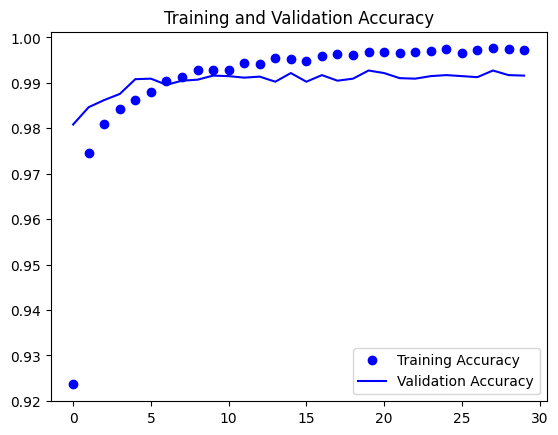

In [ ]:
epochs = range( len( accuracy ) )

plt.plot( epochs, accuracy, 'bo', label = 'Training Accuracy' )
plt.plot( epochs, val_accuracy, 'b', label = 'Validation Accuracy' )
plt.title( 'Training and Validation Accuracy' )
plt.legend()
plt.show()

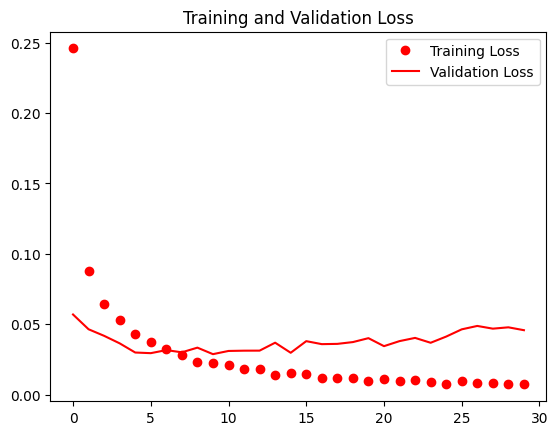

In [ ]:
plt.plot( epochs, loss, 'ro', label = 'Training Loss' )
plt.plot( epochs, val_loss, 'r', label = 'Validation Loss' )
plt.title( 'Training and Validation Loss' )
plt.legend()
plt.show()

In [ ]:
y_pred = np.argmax( model.predict( X_test ), axis = -1 )
y_true = np.argmax( y_test, axis = -1 )

329/329 [==============================] - 3s 9ms/step


<Axes: >

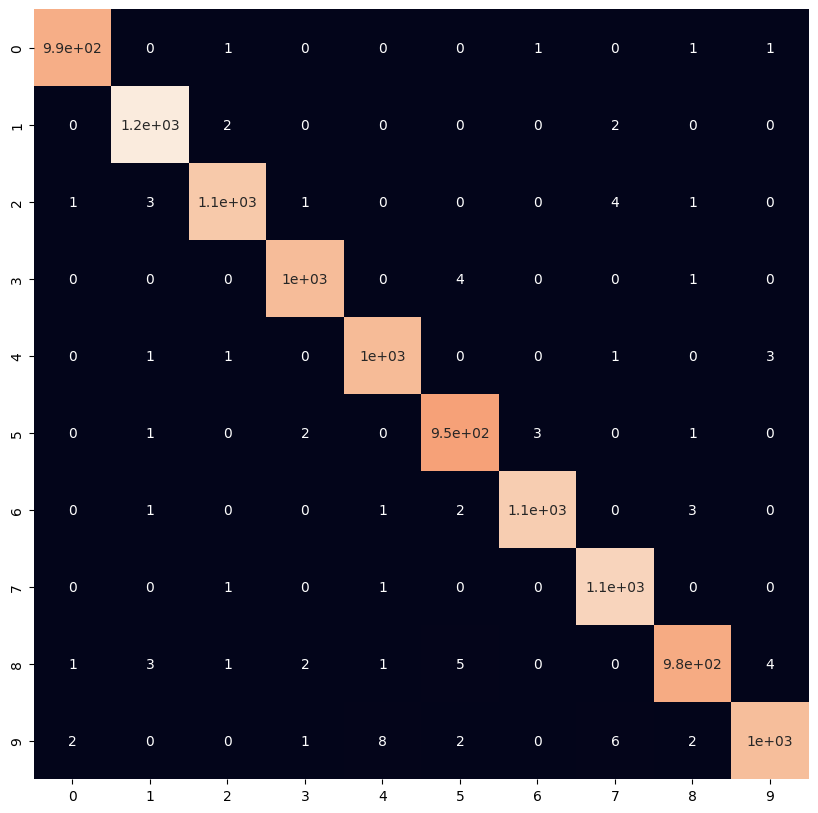

In [ ]:
cm = confusion_matrix( y_true, y_pred )
plt.figure( figsize = ( 10, 10 ) )
sns.heatmap( cm, annot = True, cbar = False )

In [ ]:
print( classification_report( y_true, y_pred ) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       0.99      1.00      0.99      1176
           2       0.99      0.99      0.99      1075
           3       0.99      1.00      0.99      1035
           4       0.99      0.99      0.99      1027
           5       0.99      0.99      0.99       956
           6       1.00      0.99      0.99      1087
           7       0.99      1.00      0.99      1105
           8       0.99      0.98      0.99       995
           9       0.99      0.98      0.99      1054

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



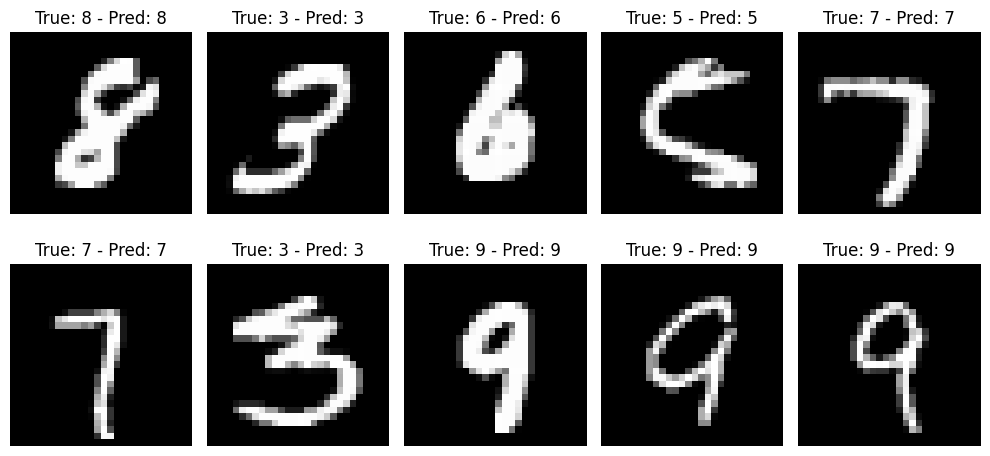

In [ ]:
fig, axs = plt.subplots( 2, 5, figsize = ( 10, 5 ) )
for i in range( 10 ):
  ax = axs[ i // 5, i % 5 ]
  image = np.array( pd.DataFrame( X_test.reshape( -1, 28 * 28 ) ).iloc[i] ).reshape( 28, 28 )
  ax.imshow( image, cmap = 'gray' )
  ax.set_title( f'True: { y_true[i] } - Pred: { y_pred[i] }' )
  ax.axis( 'off' )
plt.tight_layout()
plt.show()